<h2 style="text-align: center;">Task Set 6</h2>
<h1 style="text-align: center;">Modeling of non-homogeneous processes</h1>

#### 1.  Wczytanie potrzebnych pakietów

In [1]:
library(spatstat)

Ładowanie wymaganego pakietu: spatstat.data

Ładowanie wymaganego pakietu: spatstat.univar

spatstat.univar 3.1-1

Ładowanie wymaganego pakietu: spatstat.geom

spatstat.geom 3.3-4

Ładowanie wymaganego pakietu: spatstat.random

spatstat.random 3.3-2

Ładowanie wymaganego pakietu: spatstat.explore

Ładowanie wymaganego pakietu: nlme

spatstat.explore 3.3-4

Ładowanie wymaganego pakietu: spatstat.model

Ładowanie wymaganego pakietu: rpart

spatstat.model 3.3-3

Ładowanie wymaganego pakietu: spatstat.linnet

spatstat.linnet 3.2-3


spatstat 3.3-0 
For an introduction to spatstat, type 'beginner' 




#### 2. Wczytanie i wyświetlenie danych
Wczytaj bibliotekę spatstat oraz dane ‘lansing’. Sprawdź strukturę danych i jakie warstwy
zawierają. Wyświetl poszczególne warstwy zawierające rozmieszczenie gatunków drzew
(każdy gatunek osobno). 


List of 6
 $ window    :List of 4
  ..$ type  : chr "rectangle"
  ..$ xrange: num [1:2] 0 1
  ..$ yrange: num [1:2] 0 1
  ..$ units :List of 3
  .. ..$ singular  : chr "foot"
  .. ..$ plural    : chr "feet"
  .. ..$ multiplier: num 924
  .. ..- attr(*, "class")= chr "unitname"
  ..- attr(*, "class")= chr "owin"
 $ n         : int 2251
 $ x         : num [1:2251] 0.078 0.076 0.051 0.015 0.03 0.102 0.135 0.121 0.04 0.065 ...
 $ y         : num [1:2251] 0.091 0.266 0.225 0.366 0.426 0.474 0.498 0.489 0.596 0.608 ...
 $ markformat: chr "vector"
 $ marks     : Factor w/ 6 levels "blackoak","hickory",..: 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "class")= chr "ppp"

Unikalne warstwy:

[1] "blackoak" "hickory"  "maple"    "misc"     "redoak"   "whiteoak"

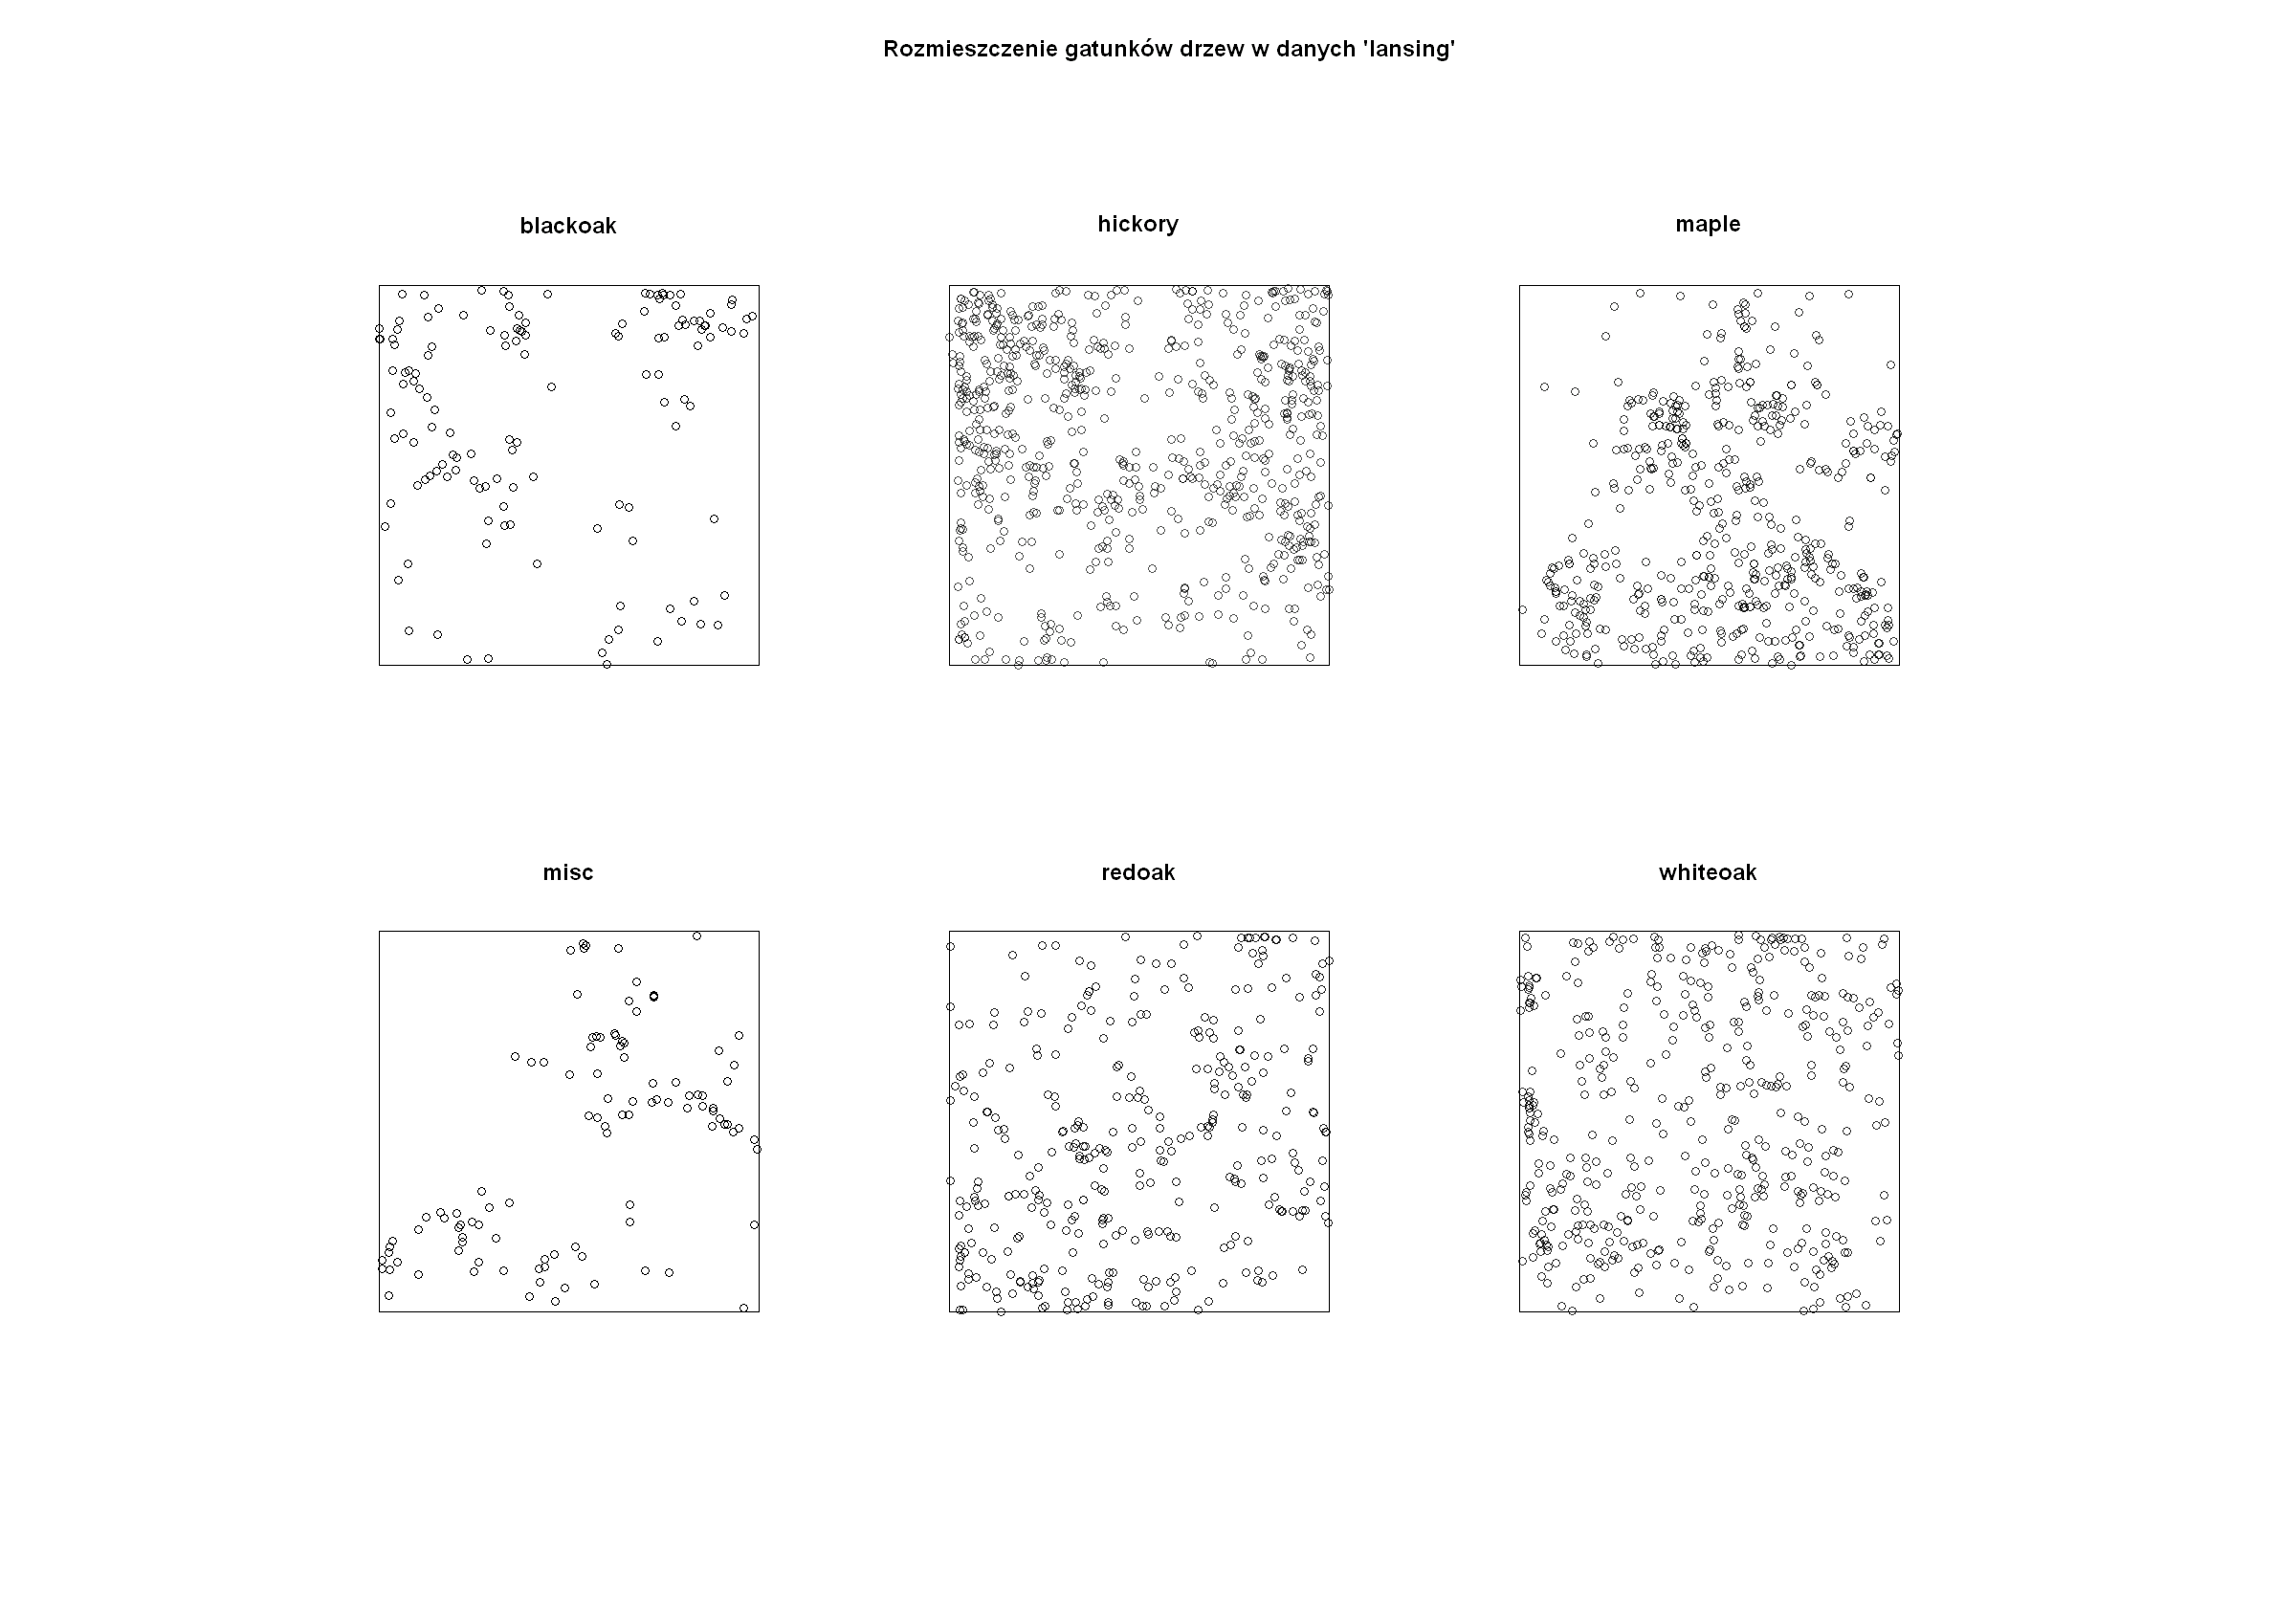

In [2]:
# Wczytanie i sprawdzenie struktury danych 
data("lansing")
str(lansing)

# Wyświetlenie unikalnych warstw oznaczających gatunki drzew w danych
cat("\nUnikalne warstwy:")
levels(lansing$marks)

# Podział danych na podzbiory odpowiadające poszczególnym gatunkom drzew
split_data <- split(lansing)

options(repr.plot.width = 20, repr.plot.height = 14) # Ustawienie szerokości okna wykresu

# Wizualizacja rozmieszczenia gatunków drzew
plot(split_data, main = "Rozmieszczenie gatunków drzew w danych 'lansing'", 
     xlab = "Współrzędna X", ylab = "Współrzędna Y")

#### 3.Wydzielenie zmiennych oraz oblicznenie rozkładu intensywności
Wydziel zmienne: zbiory czarnego dębu (blackoak) i klonu (maple). Oblicz rozkłady
intensywności obu zbiorów z domyślnymi parametrami za pomocą funkcji density(). Wyświetl
je wraz z punktami. Co możesz powiedzieć o zmianach intensywności obu zbiorów
punktowych?

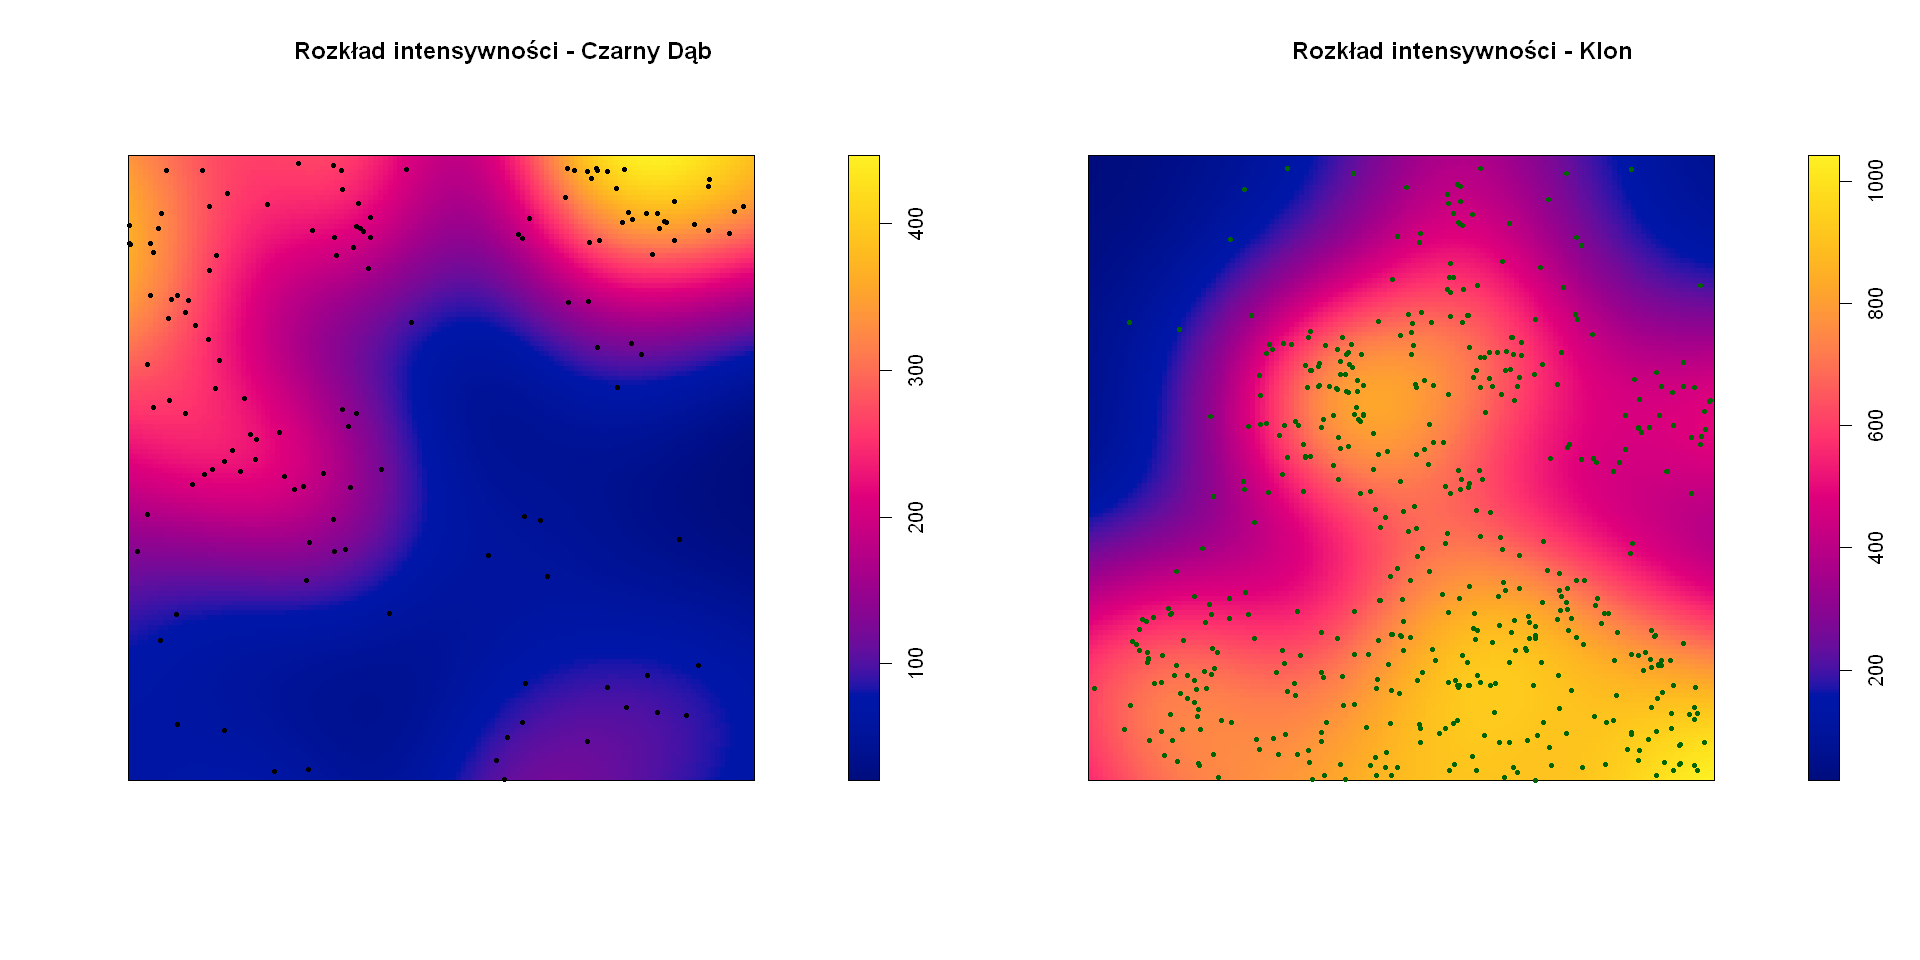

In [3]:
# Wydzielenie danych dla czarnego dębu (blackoak) i klonu (maple)
blackoak <- split_data$blackoak
maple <- split_data$maple

# Obliczenie rozkładów intensywności dla obu gatunków drzew
blackoak_density <- density(blackoak)
maple_density <- density(maple)

options(repr.plot.width = 16, repr.plot.height = 8) # Ustawienie szerokości okna wykresu

par(mfrow = c(1, 2)) # ustawienie wykresów obok siebie

# Wizualizacja rozkładu intensywności dla czarnego dębu
plot(blackoak_density, main = "Rozkład intensywności - Czarny Dąb")
points(blackoak, pch = 16, cex = 0.5, col = "black")

# Wizualizacja rozkładu intensywności dla klonu
plot(maple_density, main = "Rozkład intensywności - Klon")
points(maple, pch = 16, cex = 0.5, col = "darkgreen")

Czarny dąb wykazuje skoncentrowane skupiska o wysokiej intensywności w centralnej i północno-zachodniej części obszaru, z gwałtownym spadkiem intensywności na obrzeżach. Klon ma bardziej równomierny rozkład intensywności, z największym zagęszczeniem w centrum i łagodniejszym spadkiem na krawędziach. Oba gatunki różnią się wzorcami przestrzennymi, co może wynikać z ich preferencji środowiskowych.

#### 4. Dopasowanie modelu punktowego dla procesów punktowych
Dopasuj model punktowy dla procesów punktowych czarnego dębu i klonu zakładając, że
intensywność procesu jest stała w analizowanym oknie (jednorodny proces Poissona). Użyj
komendy ppm.

In [4]:
# Dopasowanie modelu punktowego dla procesu punktowego czarnego dębu i wyświetlenie podsumowania
ppm_blackoak <- ppm(blackoak, ~1)
cat("Podsumowanie dla czarnego dębu:")
summary(ppm_blackoak)

# Dopasowanie modelu punktowego dla procesu punktowego klonu i wyświetlenie podsumowania
ppm_maple <- ppm(maple, ~1)
cat("\n\nPodsumowanie dla klonu:")
summary(ppm_maple)

Podsumowanie dla czarnego dębu:

Point process model
Fitted to data: blackoak
Fitting method: maximum likelihood
Model was fitted analytically
Call:
ppm.ppp(Q = blackoak, trend = ~1)
Edge correction: "border"
	[border correction distance r = 0 ]
--------------------------------------------------------------------------------
Quadrature scheme (Berman-Turner) = data + dummy + weights

Data pattern:
Planar point pattern:  135 points
Average intensity 135 points per square unit (one unit = 924 feet)
Window: rectangle = [0, 1] x [0, 1] units
Window area = 1 square unit
Unit of length: 924 feet

Dummy quadrature points:
     32 x 32 grid of dummy points, plus 4 corner points
     dummy spacing: 0.03125 units (one unit = 924 feet)

Original dummy parameters: =
Planar point pattern:  1028 points
Average intensity 1030 points per square unit (one unit = 924 feet)
Window: rectangle = [0, 1] x [0, 1] units
Window area = 1 square unit
Unit of length: 924 feet
Quadrature weights:
     (counting weights based on 32 x 32 array of r



Podsumowanie dla klonu:

Point process model
Fitted to data: maple
Fitting method: maximum likelihood
Model was fitted analytically
Call:
ppm.ppp(Q = maple, trend = ~1)
Edge correction: "border"
	[border correction distance r = 0 ]
--------------------------------------------------------------------------------
Quadrature scheme (Berman-Turner) = data + dummy + weights

Data pattern:
Planar point pattern:  514 points
Average intensity 514 points per square unit (one unit = 924 feet)
Window: rectangle = [0, 1] x [0, 1] units
Window area = 1 square unit
Unit of length: 924 feet

Dummy quadrature points:
     50 x 50 grid of dummy points, plus 4 corner points
     dummy spacing: 0.02 units (one unit = 924 feet)

Original dummy parameters: =
Planar point pattern:  2504 points
Average intensity 2500 points per square unit (one unit = 924 feet)
Window: rectangle = [0, 1] x [0, 1] units
Window area = 1 square unit
Unit of length: 924 feet
Quadrature weights:
     (counting weights based on 50 x 50 array of rectangula

#### 5. Modelowanie intensywności rozkładu
Wyznacz zmienną w przestrzeni intensywności rozkładu dla danych obrazujących rozkład czarnego dębu. Załóż, że zmiana intensywności jest liniowa. Zgodnie z metodą największej wiarygodności będziemy używać modelu z intensywnością log-liniową postaci: 

$$
\lambda_{\theta} = \exp \left( \theta_0 + \theta_1 x + \theta_2 y \right).
$$

Użyj komendy `ppm` z parametrem `~ x + y`, który jest wykładnikiem funkcji modelu. Wyświetl dopasowany trend na tle rozkładu punktów. Wyświetl również rezyduum modelu (różnica intensywności obserwowanej i intensywności modelu).


Podsumowanie dla modelu:

Point process model
Fitted to data: blackoak
Fitting method: maximum likelihood (Berman-Turner approximation)
Model was fitted using glm()
Algorithm converged
Call:
ppm.ppp(Q = blackoak, trend = ~x + y)
Edge correction: "border"
	[border correction distance r = 0 ]
--------------------------------------------------------------------------------
Quadrature scheme (Berman-Turner) = data + dummy + weights

Data pattern:
Planar point pattern:  135 points
Average intensity 135 points per square unit (one unit = 924 feet)
Window: rectangle = [0, 1] x [0, 1] units
Window area = 1 square unit
Unit of length: 924 feet

Dummy quadrature points:
     32 x 32 grid of dummy points, plus 4 corner points
     dummy spacing: 0.03125 units (one unit = 924 feet)

Original dummy parameters: =
Planar point pattern:  1028 points
Average intensity 1030 points per square unit (one unit = 924 feet)
Window: rectangle = [0, 1] x [0, 1] units
Window area = 1 square unit
Unit of length: 924 feet
Quadrature weight

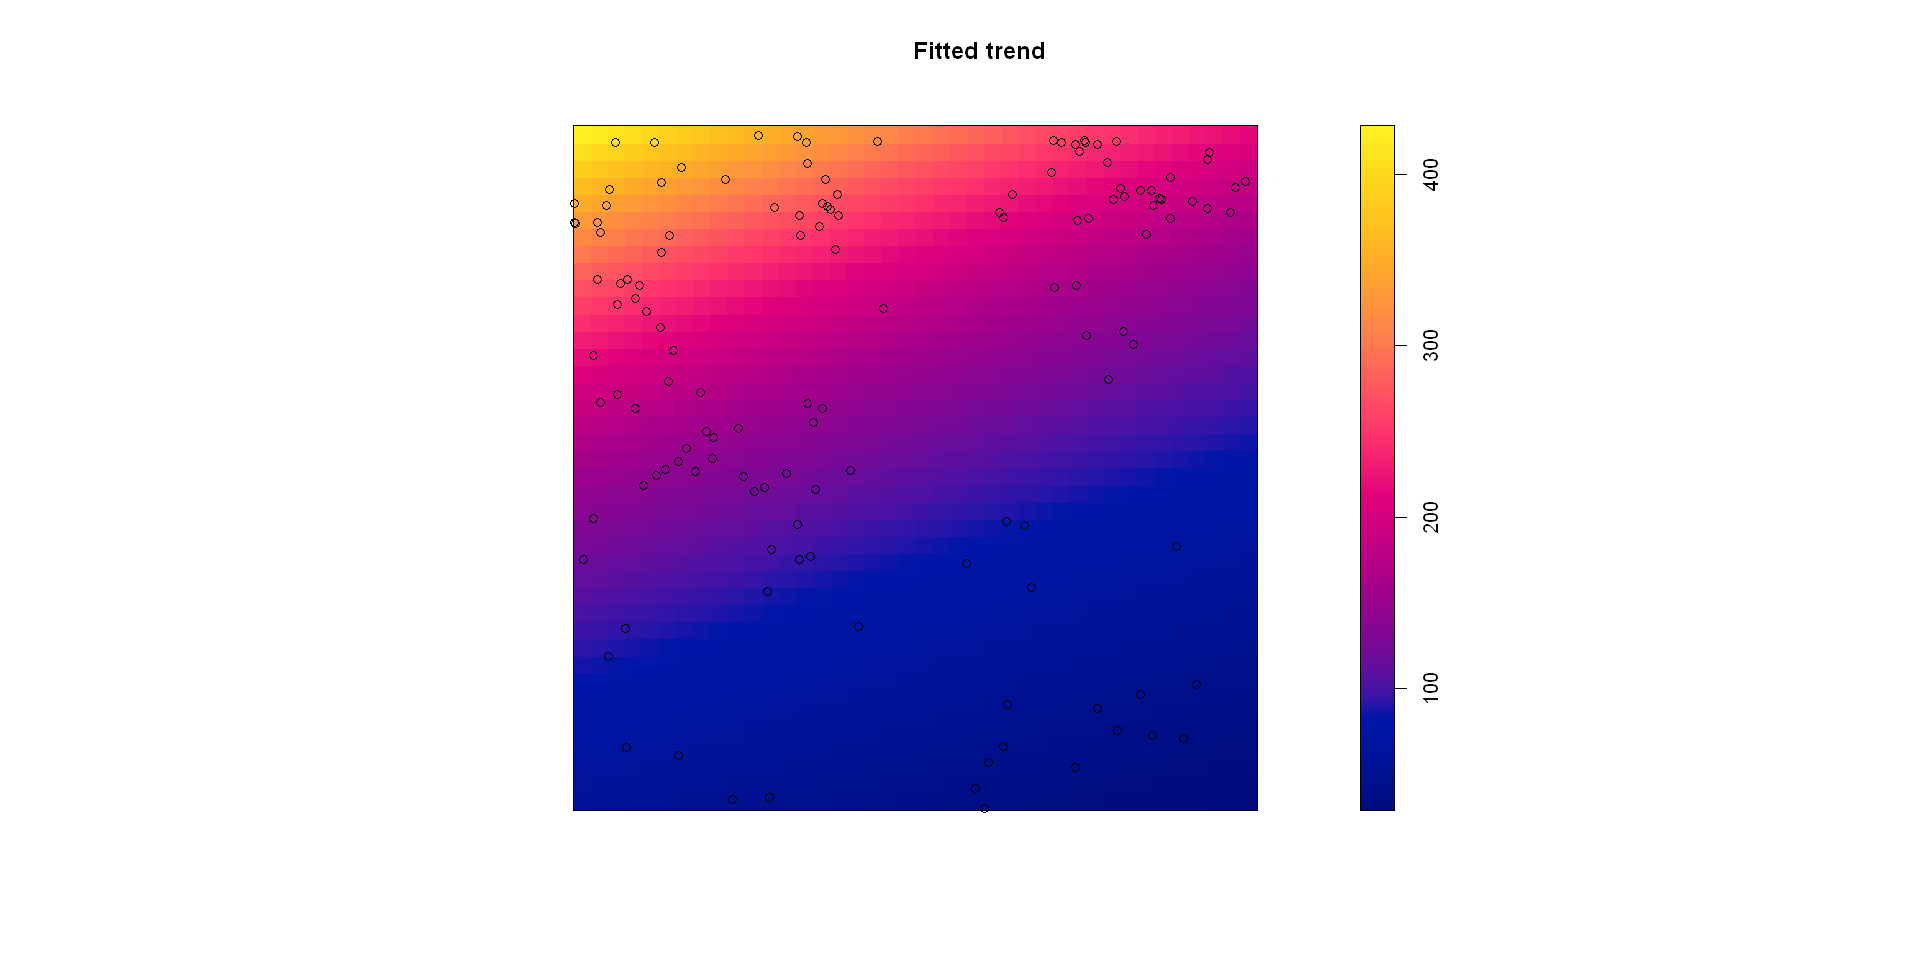

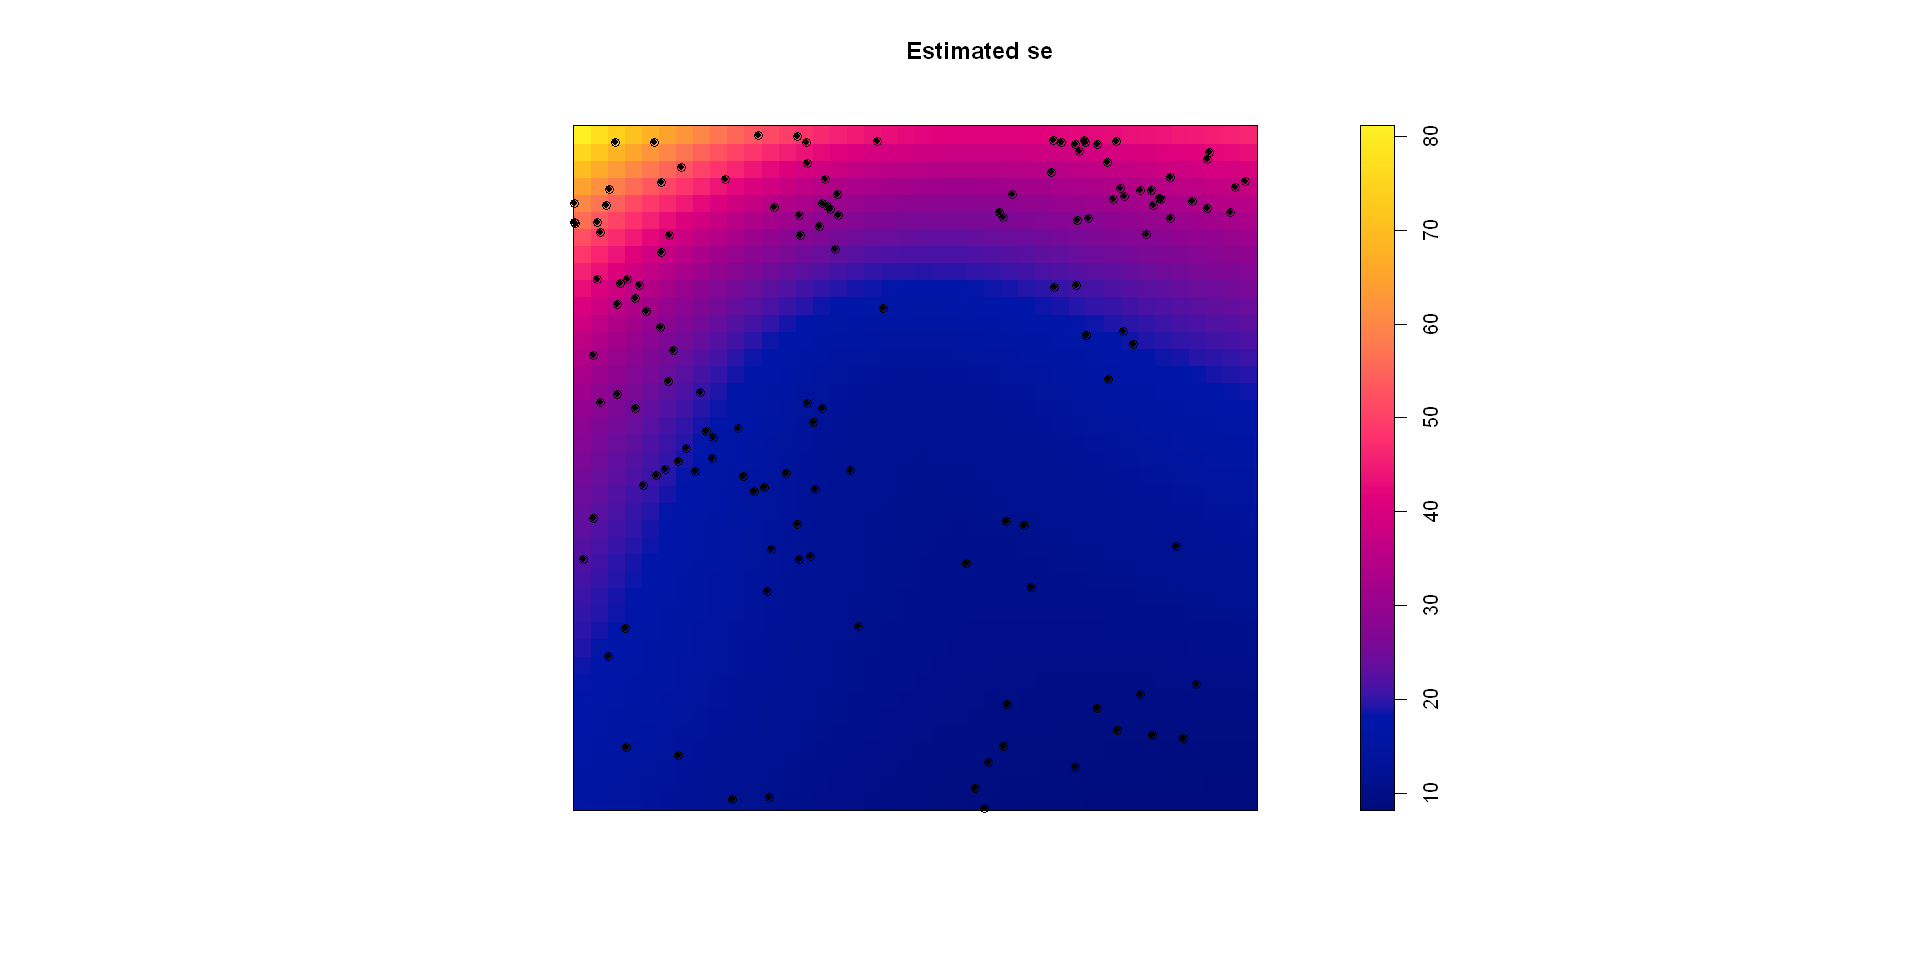

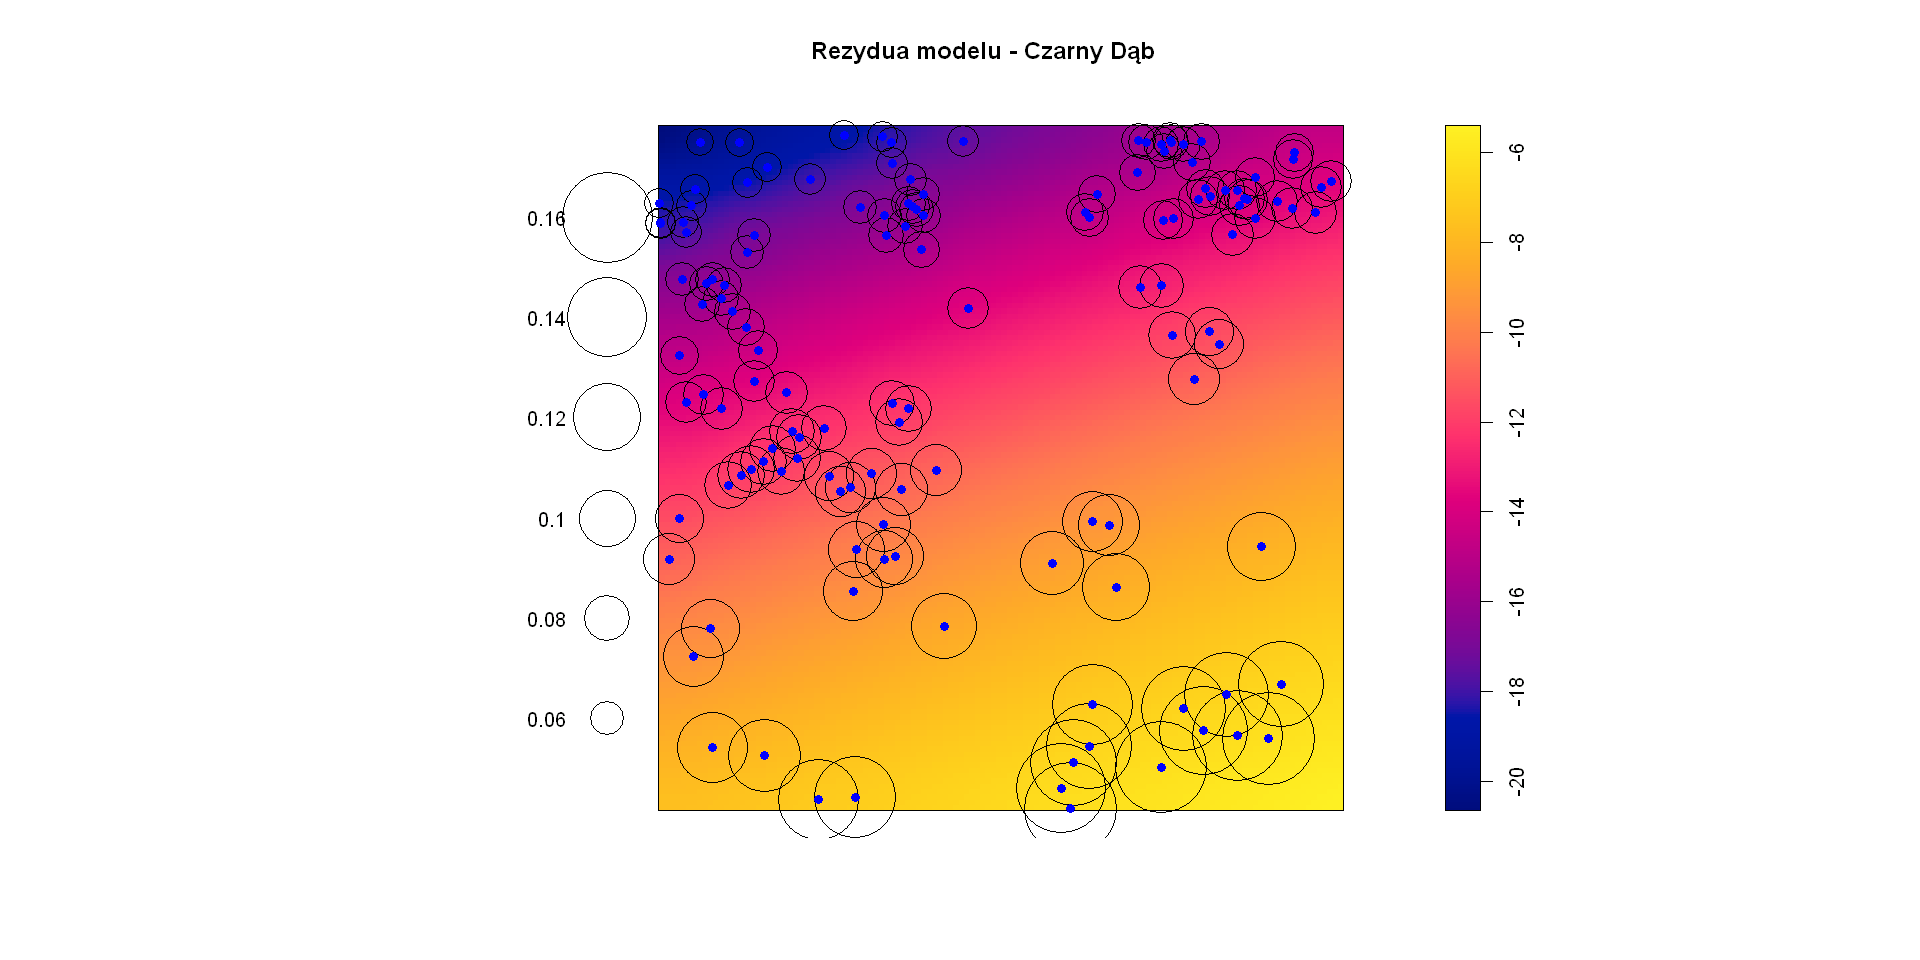

In [5]:
# Dopasowanie modelu log-liniowego dla czarnego dębu (blackoak)
ppm_blackoak_model <- ppm(blackoak, ~x + y)  # Model log-liniowy z wyrazem wolnym i współrzędnymi

cat("\nPodsumowanie dla modelu:")
summary(ppm_blackoak_model)

options(repr.plot.width = 16, repr.plot.height = 8) # Ustawienie szerokości okna wykresu

par(mfrow = c(1, 1))

# Wizualizacja trendu intensywności dla modelu log-liniowego
plot(ppm_blackoak_model)
plot(blackoak, add = TRUE, pch = 20) 

# Obliczenie rezyduów modelu
residuals_blackoak <- residuals(ppm_blackoak_model, type = "pearson")  # Rezydua Pearsona

# Wizualizacja rezyduów modelu
plot(residuals_blackoak, main = "Rezydua modelu - Czarny Dąb")  # Rezydua modelu
points(blackoak, pch = 16, col = "blue")